In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
output_dir = '/Users/bebr1814/projects/chuong_bees/analysis/pangenome/depth_plots/'

In [2]:
# depth = pd.read_csv('/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/pggb/hifiasm_communities_runs/NC_037642.1/FINAL_ODGI/Amel_Hav3.1.NC_037642.1.5kbp_windows.depth.bed', sep='\t', header=None, names=['contig','start','end','depth'])
# depth['chromosome'] = depth['contig'].str.split('#').str[-1]
# depth

In [3]:
gaps = pd.read_csv('/Users/bebr1814/projects/chuong_bees/data/reference/GCF_003254395.2_Amel_HAv3.1.gap.bed', sep='\t', header=None, names=['chromosome','start','end','gap'])

In [4]:
repeats = pd.read_csv('/Users/bebr1814/projects/chuong_bees/data/reference/GCF_003254395.2_Amel_HAv3.1.rmsk.bed', sep='\t', header=None).iloc[:,:6]

repeats.columns = ['contig','start','end','repeat_name','score','strand']

repeats['class'] = repeats['repeat_name'].str.split('#').str[-1]
repeats['chromosome'] = repeats['contig']

repeats

,contig,start,end,repeat_name,score,strand,class,chromosome
0,NC_037638.1,12,261,(ACCTTA)n#Simple_repeat,266,+,Simple_repeat,NC_037638.1
1,NC_037638.1,271,4169,(TAACC)n#Simple_repeat,47,+,Simple_repeat,NC_037638.1
2,NC_037638.1,4232,4452,(TAA)n#Simple_repeat,262,+,Simple_repeat,NC_037638.1
3,NC_037638.1,4458,4627,(AATGAT)n#Simple_repeat,299,+,Simple_repeat,NC_037638.1
4,NC_037638.1,4645,4673,(TA)n#Simple_repeat,122,+,Simple_repeat,NC_037638.1
...,...,...,...,...,...,...,...,...
290473,NW_020555944.1,847,890,(TATATT)n#Simple_repeat,146,+,Simple_repeat,NW_020555944.1
290474,NW_020555944.1,973,1016,A-rich#Low_complexity,220,+,Low_complexity,NW_020555944.1
290475,NW_020555944.1,1171,1231,(TA)n#Simple_repeat,136,+,Simple_repeat,NW_020555944.1
290476,NW_020555944.1,1362,1437,(AT)n#Simple_repeat,14,+,Simple_repeat,NW_020555944.1


In [5]:
# # Add repeat depths to depth dataframe by type


# # grab the repeats in the chromosome
# chr_reps = repeats[repeats['chromosome'] == depth['chromosome'].unique()[0]]

# # Create a column for each repeat type
# for cl in chr_reps['class'].unique():
#     # Initialize column for this repeat type
#     depth[f'repeat_depth_{cl}'] = 0
    
#     # Get repeats of this type
#     chr_reps_cl = chr_reps[chr_reps['class'] == cl]
    
#     # For each depth window
#     for idx, row in depth.iterrows():
#         # Count repeats that overlap with this window
#         overlaps = chr_reps_cl[
#             (chr_reps_cl['start'] <= row['end']) & 
#             (chr_reps_cl['end'] >= row['start'])
#         ]
#         depth.loc[idx, f'repeat_depth_{cl}'] = len(overlaps)

# depth

In [6]:
# # Plot depth
# nrows = depth.columns.str.contains('repeat_depth_').sum()+1
# fig,ax = plt.subplots(nrows,1,figsize=(15,10), dpi=300)
# # simple lineplot
# sns.lineplot(x='start', y='depth', data=depth, ax=ax[0])
# ax[0].set_xlabel('Position')
# ax[0].set_ylabel('Depth')
# ax[0].set_yscale('log')
# ax[0].set_title('Depth of Amel_Hav3.1.NC_037642.1')

# # plot the repeat depths
# for i, col in enumerate(depth.columns[depth.columns.str.contains('repeat_depth_')]):
#     sns.lineplot(x='start', y=col, data=depth, ax=ax[i+1])
#     ax[i+1].set_xlabel('Position')
#     ax[i+1].set_ylabel('Repeat Depth')
#     ax[i+1].set_title(f'Repeat Depth of Amel_Hav3.1.NC_037642.1: {col}')

# sns.despine()
# fig.tight_layout()
# plt.show()

In [7]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# from matplotlib.patches import Patch


# # Create layout with GridSpec to control height ratios
# fig = plt.figure(figsize=(20, 8), dpi=300)
# gs = fig.add_gridspec(2, 2, width_ratios=[20, 1], height_ratios=[3, 1], wspace=0.05, hspace=0.3)

# # Axes for lineplot and heatmap
# ax0 = fig.add_subplot(gs[0, 0])  # depth lineplot
# ax1 = fig.add_subplot(gs[1, 0])  # heatmap
# cax = fig.add_subplot(gs[1, 1])  # colorbar (outside, right of heatmap)

# # Plot depth line
# sns.lineplot(x='start', y='depth', data=depth, ax=ax0, label='Depth')
# ax0.set_xlabel('Position')
# ax0.set_ylabel('Depth')
# ax0.set_yscale('log')
# ax0.set_title('Depth of Amel_Hav3.1.NC_037642.1')

# # Add gaps as red spans
# gaps_chr = gaps[gaps['chromosome'] == depth['chromosome'].unique()[0]]
# for _, row in gaps_chr.iterrows():
#     ax0.axvspan(row['start'], row['end'], color='red', alpha=0.3)# Create custom legend handles
# gap_patch = Patch(color='red', alpha=0.3, label='Gap')
# handles, labels = ax0.get_legend_handles_labels()
# handles.append(gap_patch)
# labels.append('Gap in assembly')
# ax0.legend(handles=handles, labels=labels)


# # Prepare heatmap data
# repeat_columns = [col for col in depth.columns if col.startswith('repeat_depth_')]
# heatmap_data = depth[repeat_columns].T.values
# repeat_labels = [col.replace('repeat_depth_', '') for col in repeat_columns]
# genomic_start = depth['start'].iloc[0]
# genomic_end = depth['start'].iloc[-1]

# # Plot heatmap with imshow
# im = ax1.imshow(
#     heatmap_data,
#     aspect='auto',
#     cmap='Greys',
#     extent=[genomic_start, genomic_end, 0, len(repeat_labels)],
#     origin='lower',
#     interpolation='none'
# )

# # Set axis labels and ticks
# ax1.set_yticks(np.arange(len(repeat_labels)) + 0.5)
# ax1.set_yticklabels(repeat_labels)
# ax1.set_xlim(ax0.get_xlim())
# ax1.set_xlabel('Genomic Position')
# ax1.set_title('Repeat Depth Heatmap')

# # Add colorbar without breaking layout
# cb = fig.colorbar(im, cax=cax)
# cb.set_label('Repeat Depth')

# # Clean layout
# sns.despine()
# plt.tight_layout()
# plt.show()


In [8]:
import glob
import os
from matplotlib.patches import Patch

def plot_depth_by_sample(chromosome='NC_037653.1',start=None,end=None,save=True):
	depth_files = glob.glob(f'/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/pggb/flye_run/chrom_graphs/ODGI/{chromosome}.*.depth.bed')

	depth = pd.DataFrame()

	for depth_file in depth_files:
		# Get sample name from file name
		sample_name = os.path.basename(depth_file).split('.')[2]
		if sample_name == '5kbp_windows':
			continue
		
		# haplotype = os.path.basename(depth_file).split('.')[3]

		# unique_id = sample_name + ' ' + haplotype
		unique_id = sample_name

		# Read depth file
		df = pd.read_csv(depth_file, sep='\t', header=None, names=['contig','start','end','depth'])
		df['chromosome'] = df['contig'].str.split('#').str[-1]
		df['sample'] = unique_id

		depth = pd.concat([depth, df], ignore_index=True)

	if start is not None and end is not None:
		depth = depth[(depth['start'] >= start) & (depth['end'] <= end)]

	# Plot depth for each sample
	fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
	heatmap_df = depth.pivot_table(index='start', columns='sample', values='depth').T
	# log transform the depth values
	heatmap_df = np.log10(heatmap_df + 1)
	sns.heatmap(data=heatmap_df, cmap='rocket', ax=ax)
	ax.set_ylabel('Sample Haplotype')
	ax.set_xlabel('Position w.r.t. Reference (Megabase)')
	ax.set_title(f'Depth of {chromosome}')
	# label the colorbar as log
	cb = ax.collections[0].colorbar
	cb.set_label('log10(Depth + 1)')

	# Determine range of genomic positions
	positions = heatmap_df.columns.astype(int)
	start_pos = positions.min()
	end_pos = positions.max()

	# Create regular ticks every 1 Mb
	tick_vals_bp = np.arange(start=start_pos, stop=end_pos + 1, step=1_000_000)

	# Find closest column indices for those tick positions
	tick_indices = [np.abs(positions - val).argmin() for val in tick_vals_bp]
	tick_labels = tick_vals_bp / 1_000_000  # Convert to Mb

	# Apply to axis
	ax.set_xticks(tick_indices)
	ax.set_xticklabels([f"{mb:.0f}" for mb in tick_labels], rotation=0, ha='center')
	
	plt.tight_layout()
	if save:
		plt.savefig(f'/Users/bebr1814/projects/chuong_bees/analysis/pangenome/depth_plots/{chromosome}_depth_by_haplotype.flye.png', dpi=300, bbox_inches='tight')
		plt.savefig(f'/Users/bebr1814/projects/chuong_bees/analysis/pangenome/depth_plots/{chromosome}_depth_by_haplotype.flye.pdf', dpi=300, bbox_inches='tight')
		plt.close('all')
	else:
		plt.show()



In [48]:

# for chrom in glob.glob('/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/pggb/hifiasm_communities_runs/NC_*'):
for chrom in glob.glob('/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/pggb/flye_run/chrom_graphs/ODGI/NC_*.og'):
	chrom = os.path.basename(chrom).replace('.og','')
	print(chrom)
	plot_depth_by_sample(chrom)


NC_037650.1
NC_037641.1
NC_037644.1
NC_037642.1
NC_037649.1
NC_037640.1
NC_001566.1
NC_037652.1
NC_037643.1
NC_037639.1
NC_037646.1
NC_037645.1
NC_037648.1
NC_037647.1
NC_037638.1
NC_037653.1
NC_037651.1


/tmp/ipykernel_30223/3069807383.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  depth = pd.concat([depth, df], ignore_index=True)


In [ ]:

# Function to process each chromosome
def depth_plot(depth_file,start=None,end=None,save=True):

	# Load depth data
	depth = pd.read_csv(depth_file, sep="\t", header=None, names=["contig", "start", "end", "depth"])
	depth["chromosome"] = depth["contig"].str.split("#").str[-1]

	if start is not None and end is not None:
		depth = depth[(depth["start"] >= start) & (depth["end"] <= end)]

	# Filter repeats for the current chromosome
	chr_reps = repeats[repeats["contig"] == depth["chromosome"].unique()[0]]

	# Add repeat depths to the depth dataframe
	for cl in chr_reps["class"].unique():
		depth[f"repeat_depth_{cl}"] = 0
		chr_reps_cl = chr_reps[chr_reps["class"] == cl]
		for idx, row in depth.iterrows():
			overlaps = chr_reps_cl[
				(chr_reps_cl["start"] <= row["end"]) & (chr_reps_cl["end"] >= row["start"])
			]
			depth.loc[idx, f"repeat_depth_{cl}"] = len(overlaps)

	# Create layout with GridSpec to control height ratios
	fig = plt.figure(figsize=(20, 8), dpi=300)
	gs = fig.add_gridspec(2, 2, width_ratios=[20, 1], height_ratios=[3, 1], wspace=0.05, hspace=0.3)

	# Axes for lineplot and heatmap
	ax0 = fig.add_subplot(gs[0, 0])  # depth lineplot
	ax1 = fig.add_subplot(gs[1, 0])  # heatmap
	cax = fig.add_subplot(gs[1, 1])  # colorbar (outside, right of heatmap)

	# Plot depth line
	sns.lineplot(x='start', y='depth', data=depth, ax=ax0, label='Depth')
	ax0.set_xlabel('Position')
	ax0.set_ylabel('Depth')
	# ax0.set_yscale('log')
	ax0.set_title(f"Depth of {depth['chromosome'].unique()[0]}")

	# Add gaps as red spans
	gaps_chr = gaps[gaps['chromosome'] == depth['chromosome'].unique()[0]]
	if start is not None and end is not None:
		gaps_chr = gaps_chr[(gaps_chr['start'] >= start) & (gaps_chr['end'] <= end)]
	for _, row in gaps_chr.iterrows():
		ax0.axvspan(row['start'], row['end'], color='red', alpha=0.3)

	# Create custom legend handles
	gap_patch = Patch(color='red', alpha=0.3, label='Gap')
	handles, labels = ax0.get_legend_handles_labels()
	handles.append(gap_patch)
	labels.append('Gap in assembly')
	ax0.legend(handles=handles, labels=labels)

	# Prepare heatmap data
	repeat_columns = [col for col in depth.columns if col.startswith('repeat_depth_')]
	if repeat_columns:  # Check if there are repeat columns to plot
		heatmap_data = depth[repeat_columns].T.values
		repeat_labels = [col.replace('repeat_depth_', '') for col in repeat_columns]
		if start is not None and end is not None:
			genomic_start = start
			genomic_end = end
		else:
			genomic_start = depth['start'].iloc[0]
			genomic_end = depth['start'].iloc[-1]

		# Plot heatmap with imshow
		im = ax1.imshow(
			heatmap_data,
			aspect='auto',
			cmap='Greys',
			extent=[genomic_start, genomic_end, 0, len(repeat_labels)],
			origin='lower',
			interpolation='nearest'  # Use 'nearest' for sharp heatmap
		)

		# Set axis labels and ticks
		ax1.set_yticks(np.arange(len(repeat_labels)) + 0.5)
		ax1.set_yticklabels(repeat_labels)
		ax1.set_xlim(ax0.get_xlim())
		ax1.set_xlabel('Genomic Position')
		ax1.set_title('Repeat Depth Heatmap')

		# Add colorbar without breaking layout
		cb = fig.colorbar(im, cax=cax)
		cb.set_label('Repeat Depth')
	else:
		ax1.axis('off')  # Hide heatmap axis if no repeat data
		cax.axis('off')  # Hide colorbar axis if no repeat data

	# Adjust layout manually instead of tight_layout
	fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.1, wspace=0.2, hspace=0.3)

	sns.despine()

	# Save the plot as an editable PDF
	if save:
		output_file = os.path.join(output_dir, f"{depth['chromosome'].unique()[0]}_depth_plot.pdf")
		plt.savefig(output_file, format="pdf", bbox_inches='tight', dpi=300)
		plt.savefig(output_file.replace('.pdf', '.png'), format="png", bbox_inches='tight', dpi=300)
		plt.close()
		print(f"Plot saved to {output_file}")
	else:

		plt.show()

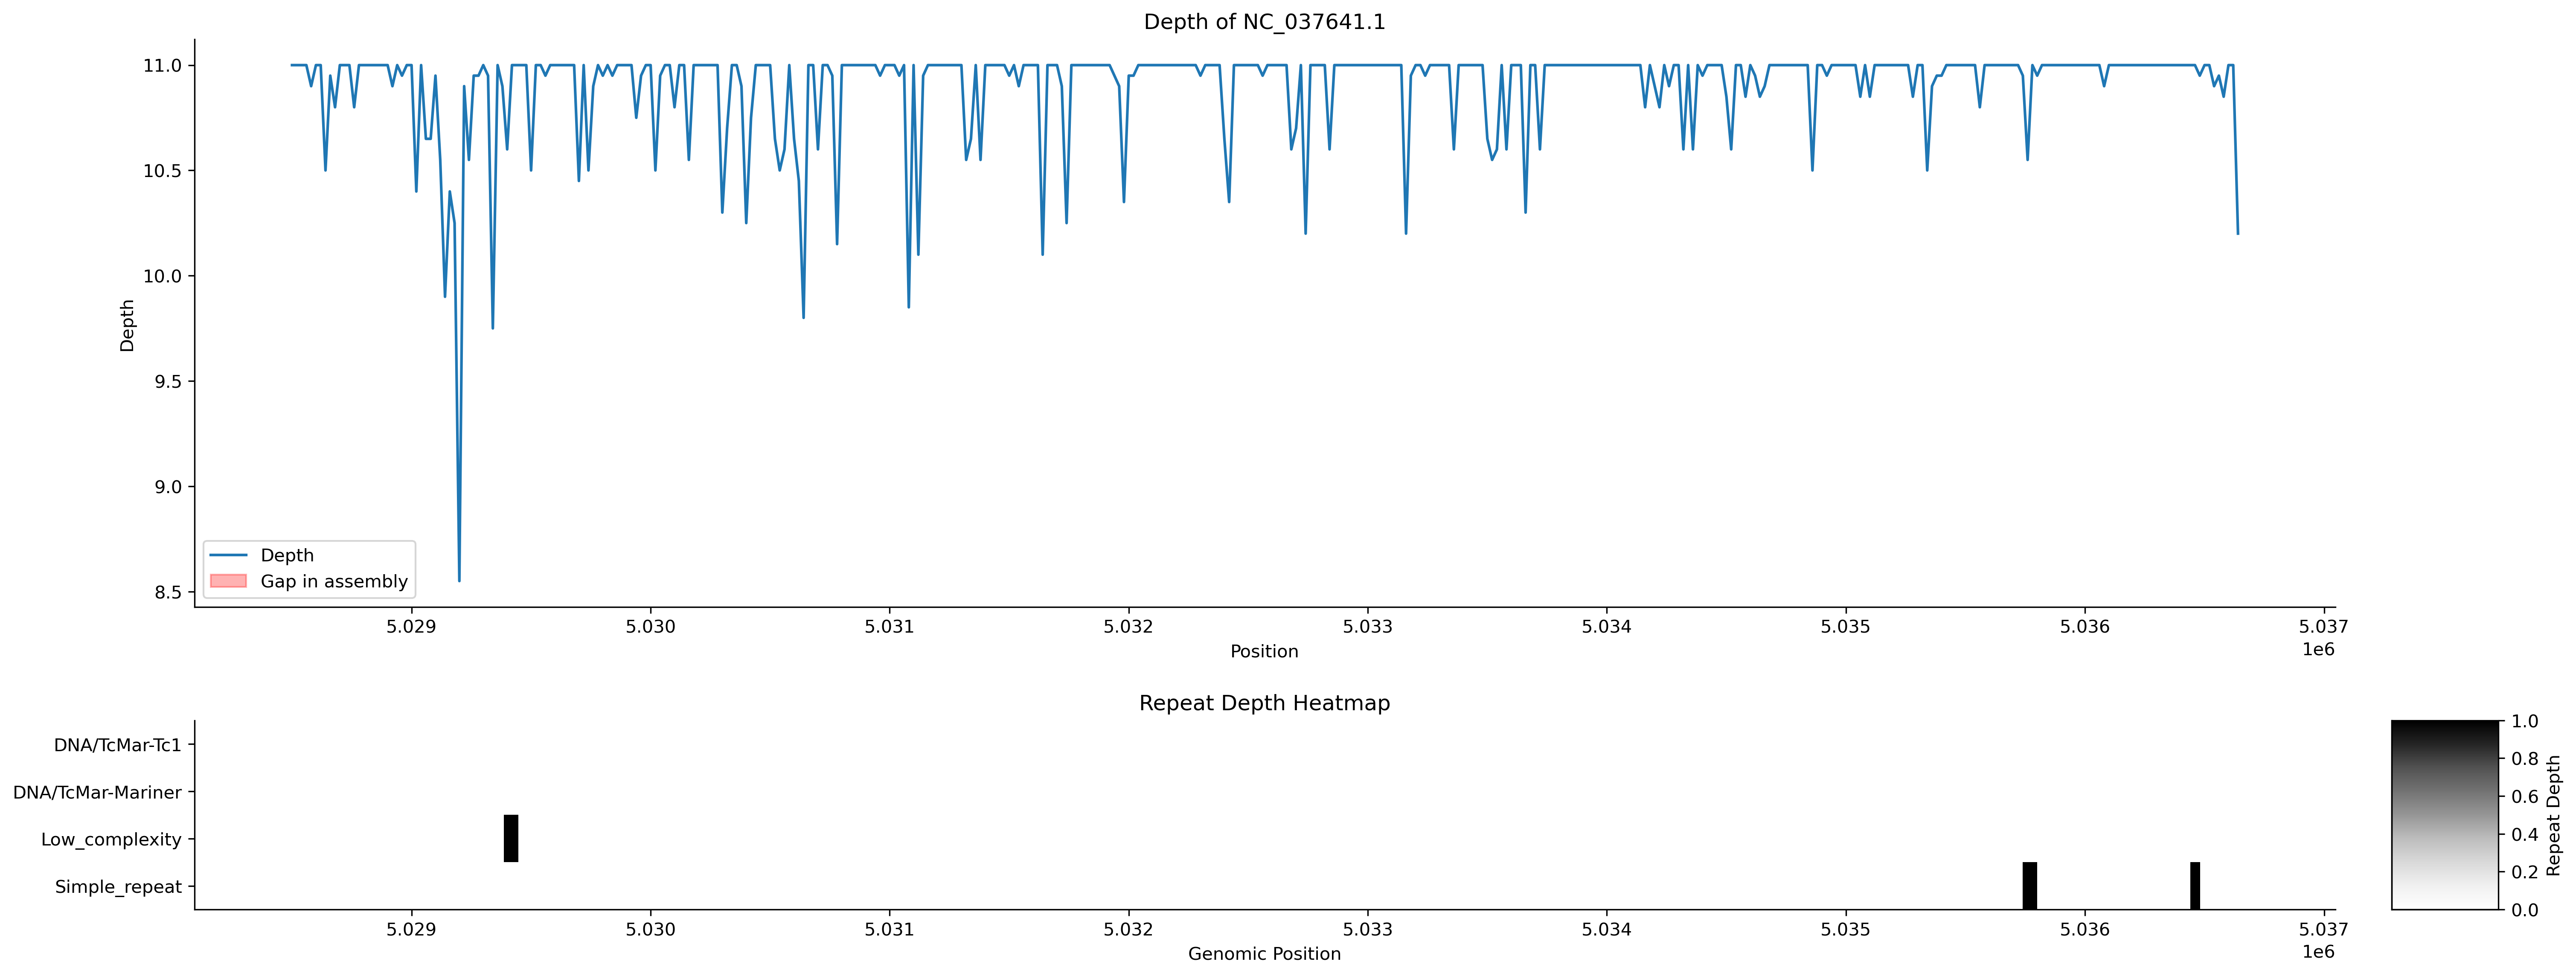

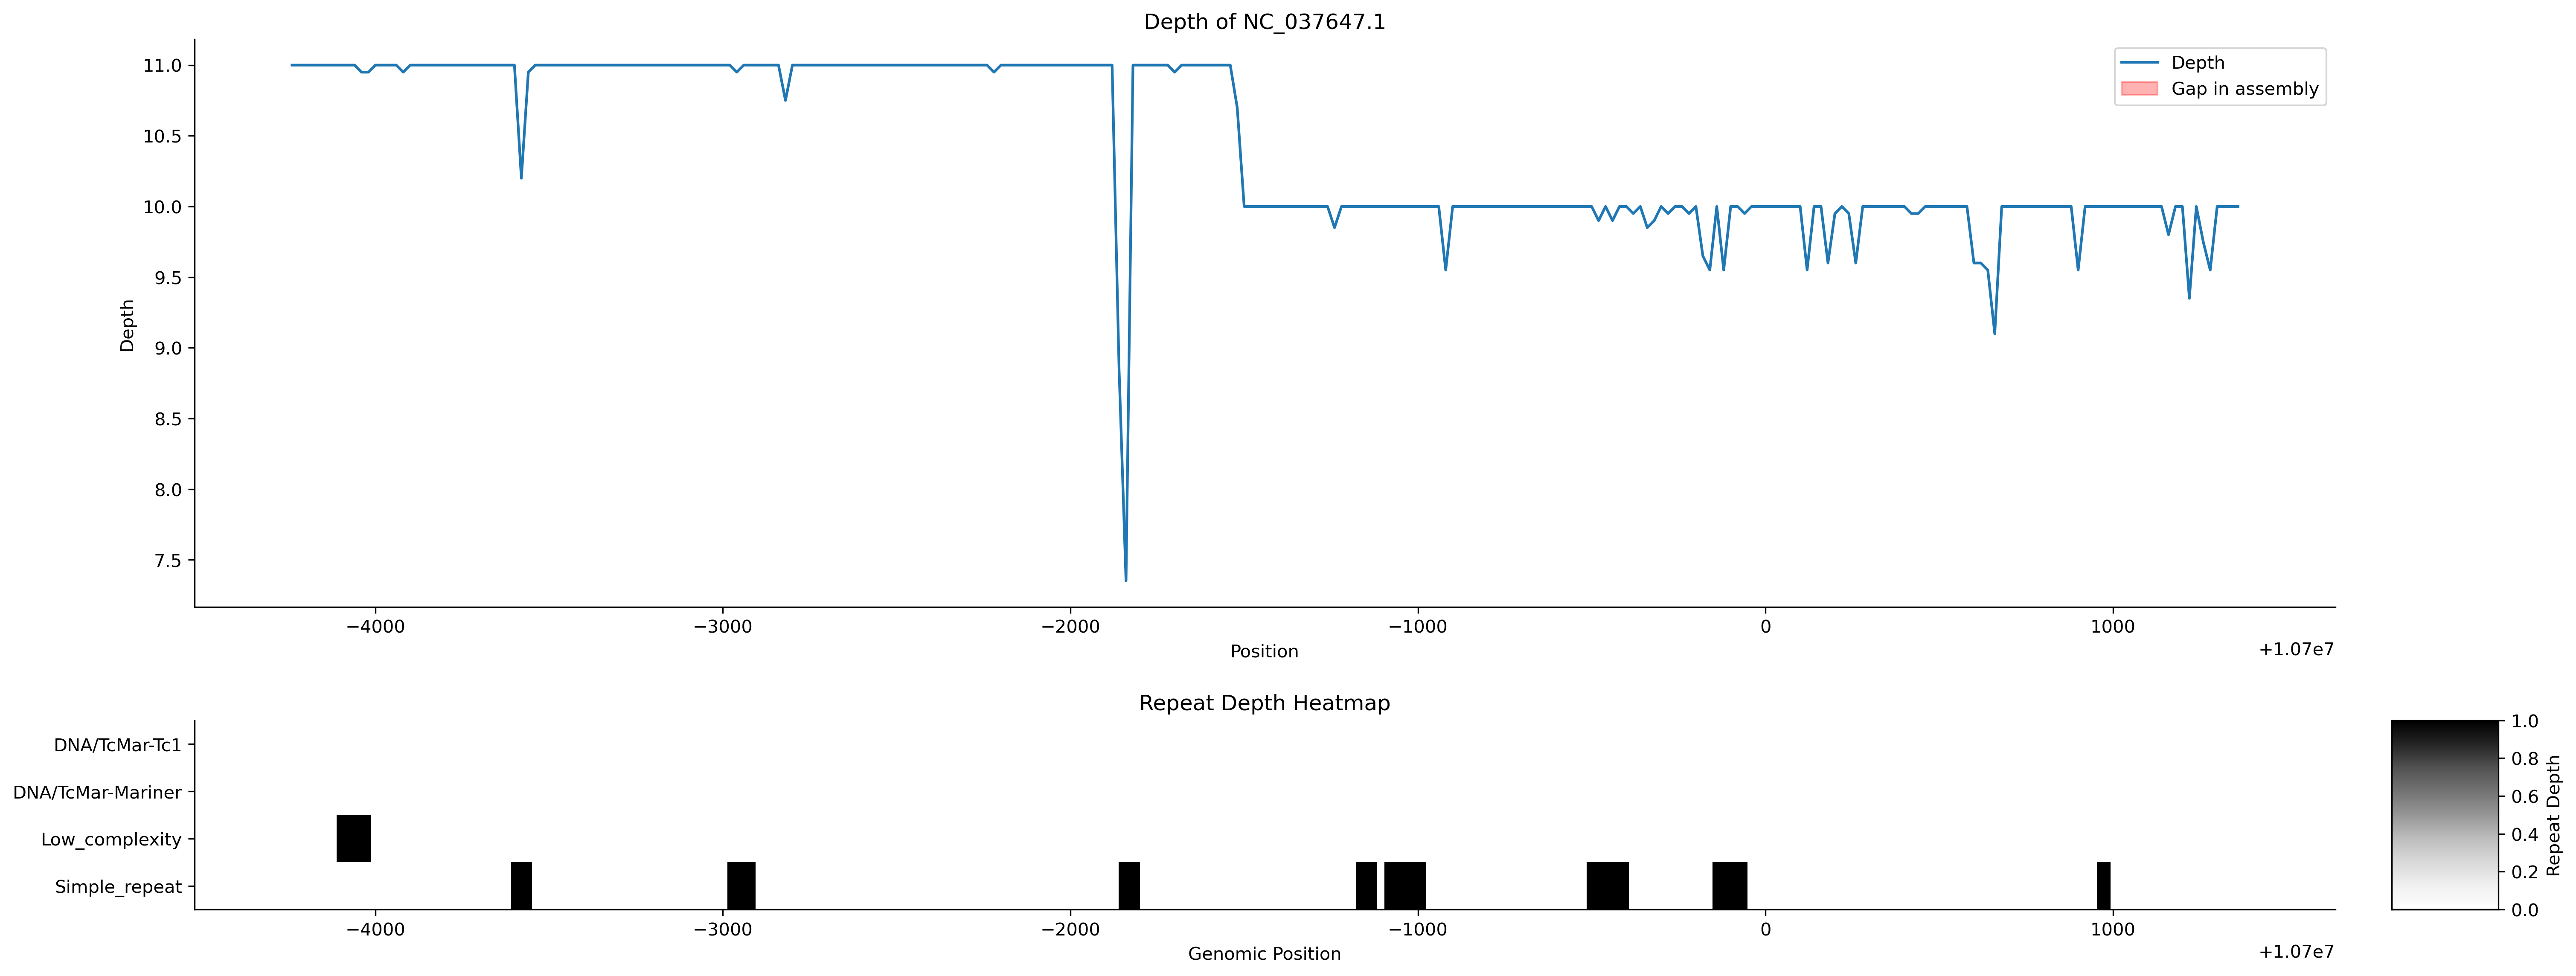

In [16]:
# depth_plot(depth_file='/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/pggb/flye_run/chrom_graphs/ODGI/NC_037652.1.5kbp_windows.depth.bed',)# start=13690589-200_000, end=14052771+200_000, save=False)

# vg : NC_037641.1:5029485-5035661
depth_plot(depth_file='/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/pggb/flye_run/chrom_graphs/ODGI/NC_037641.1.20bp_windows.depth.bed', start=5029485-1_000, end=5035661+1_000, save=False)

# GAPDH: NC_037647.1:10696747-10700395
depth_plot(depth_file='/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/pggb/flye_run/chrom_graphs/ODGI/NC_037647.1.20bp_windows.depth.bed', start=10696747-1_000, end=10700395+1_000, save=False)

In [ ]:
# convert depth bed to viz format
bed = '/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/pggb/hifiasm_communities_runs/NC_037643.1/FINAL_ODGI/NC_037643.1.5kbp_windows.depth.bed'

df = pd.read_csv(bed, sep='\t', header=None, names=['contig','start','end','depth'])
# change contigs from Amel_Hav3.1#1#NC_037643.1 to NC_037643.1
df['contig'] = df['contig'].str.split('#').str[-1]
# add the rest of the columns
df['name'] = df['depth']
df['strand'] = '+'
df = df[['contig','start','end','name','depth','strand']]
# save to bed
df.to_csv('/Users/bebr1814/projects/chuong_bees/data/20250211_1135_P2S-00613-A_PBA08559_66fdcccd/uncorrected_fastq/pggb/hifiasm_communities_runs/NC_037643.1/FINAL_ODGI/NC_037643.1.5kbp_windows.depth.bed6.bed', sep='\t', header=False, index=False)


# Note to self: check this gene in IGV for high depth - it's related to varroa hygiene and has very high SNPs in all samples